# IMPORTAÇÃO DE BIBLIOTECAS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# LEITURA DAS TABELAS

In [ ]:
df = pd.read_csv('df_unificado.csv')

In [ ]:
codigo_estados = {
    11 : "Rondônia",
    12 : "Acre",
    13 : "Amazonas",
    14 : "Roraima",
    15 : "Pará",
    16 : "Amapá",
    17 : "Tocantins",
    21 : "Maranhão",
    22 : "Piauí",
    23 : "Ceará",
    24 : "Rio Grande do Norte",
    25 : "Paraíba",
    26 : "Pernambuco",
    27 : "Alagoas",
    28 : "Sergipe",
    29 : "Bahia",
    31 : "Minas Gerais",
    32 : "Espírito Santo",
    33 : "Rio de Janeiro",
    35 : "São Paulo",
    41 : "Paraná",
    42 : "Santa Catarina",
    43 : "Rio Grande do Sul",
    50 : "Mato Grosso do Sul",
    51 : "Mato Grosso",
    52 : "Goiás",
    53 : "Distrito Federal"
}

In [ ]:
df

,UF,ano,qtd_caps,gini,ivs,anos_estudo,ppc_685,taxa_desemprego,renda_mdpc,taxa_suicidio
0,11,2014,3.0,0.443,0.176,7.70,580285,4.25,1230.283078,5.035971
1,11,2015,5.0,0.462,0.206,8.08,630481,5.65,1224.803032,6.457346
2,11,2016,4.0,0.465,0.193,8.00,647250,8.03,1194.016683,6.030445
3,11,2017,5.0,0.447,0.189,8.40,600513,8.28,1250.239373,6.543138
4,11,2018,3.0,0.496,0.197,8.60,585968,9.23,1413.383040,7.155123
...,...,...,...,...,...,...,...,...,...,...
265,53,2019,NaN,0.554,0.260,11.60,539421,13.45,3173.840685,6.604713
266,53,2020,NaN,0.548,0.270,NaN,545608,14.85,2929.982478,6.485424
267,53,2021,NaN,0.566,0.259,NaN,654329,13.95,2844.489559,6.466984
268,53,2022,1.0,0.536,0.236,11.90,536718,11.33,2946.853893,8.536585


# Análise Exploratória

In [ ]:
df_medias = df.drop(columns=['ano'])
df_medias = df_medias.groupby('UF').mean()
df_medias = df_medias.reset_index()
df_medias['UF'] = df_medias['UF'].map(codigo_estados)
df_medias

,UF,qtd_caps,gini,ivs,anos_estudo,ppc_685,taxa_desemprego,renda_mdpc,taxa_suicidio
0,Rondônia,6.00,0.4585,0.186444,8.47250,584840.2,7.101,1308.931586,7.312164
1,Acre,13.00,0.5391,0.353333,8.44125,448815.5,12.059,1092.548107,8.025159
2,Amazonas,5.60,0.5469,0.325444,9.47500,2140525.3,12.669,1045.563468,6.700810
3,Roraima,3.50,0.5472,0.257333,10.04500,232186.9,10.313,1345.456015,9.218640
4,Pará,76.40,0.5146,0.286333,8.45500,4327188.6,10.285,1028.183726,4.215366
5,Amapá,3.25,0.5327,0.231778,9.83875,408739.4,15.028,1161.852760,7.002367
6,Tocantins,5.80,0.5030,0.238889,8.76375,620774.7,9.920,1278.924271,8.178350
7,Maranhão,50.90,0.5067,0.342444,7.60125,4230186.3,12.198,802.443640,4.849098
8,Piauí,14.60,0.5220,0.281444,7.64875,1643818.4,11.010,1074.393155,9.835458
9,Ceará,126.40,0.5373,0.269333,8.00625,4671483.0,10.897,1099.964062,7.354417


In [ ]:
top_10_uf = df_medias.sort_values(by='taxa_suicidio', ascending=False).head(10)['UF'].tolist()
bottom_10_uf = df_medias.sort_values(by='taxa_suicidio', ascending=True).head(10)['UF'].tolist()

selected_uf_names = top_10_uf + bottom_10_uf

reverse_codigo_estados = {v: k for k, v in codigo_estados.items()}

selected_uf_codes = [reverse_codigo_estados[uf_name] for uf_name in selected_uf_names]

df_filtered_ufs = df[df['UF'].isin(selected_uf_codes)].copy()

df_filtered_ufs['Estado_Nome'] = df_filtered_ufs['UF'].map(codigo_estados)

def categorize_uf(row):
    if row['Estado_Nome'] in top_10_uf:
        return 'Top 10 Suicide Rate'
    elif row['Estado_Nome'] in bottom_10_uf:
        return 'Bottom 10 Suicide Rate'
    else:
        return None

df_filtered_ufs['categoria_uf'] = df_filtered_ufs.apply(categorize_uf, axis=1)

parameters_to_plot = ['ivs', 'ppc_685', 'anos_estudo', 'gini', 'renda_mdpc', 'taxa_desemprego', 'qtd_caps', 'taxa_suicidio']
avg_data_by_category = df_filtered_ufs.groupby('categoria_uf')[parameters_to_plot].mean().reset_index()

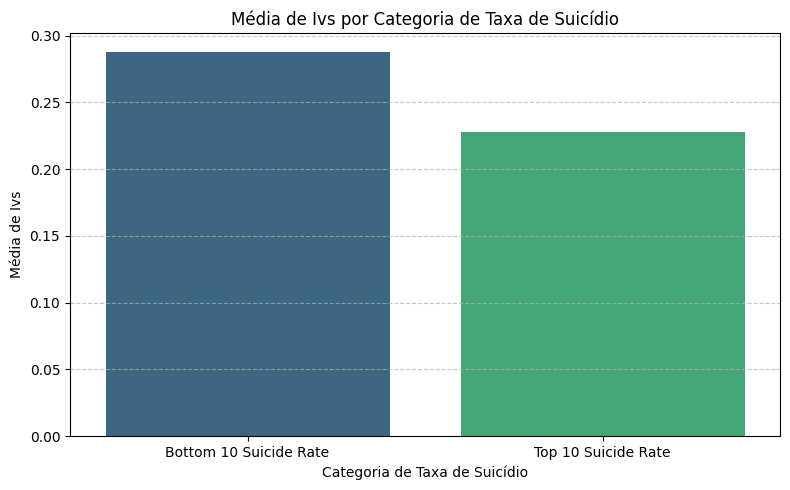

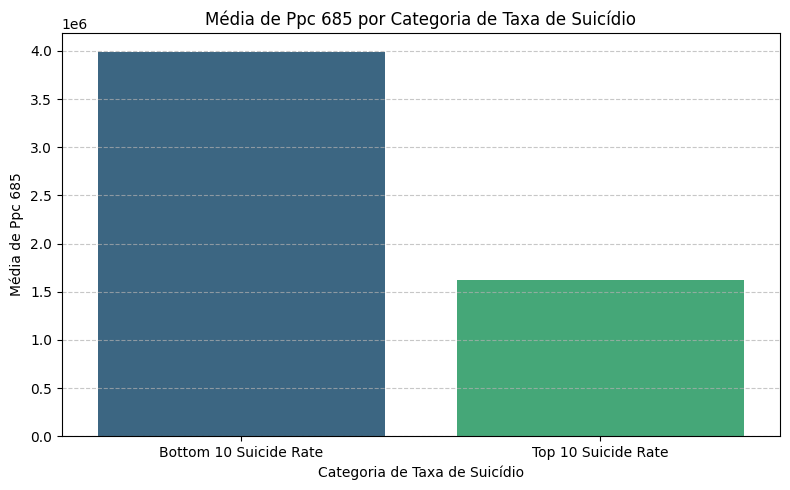

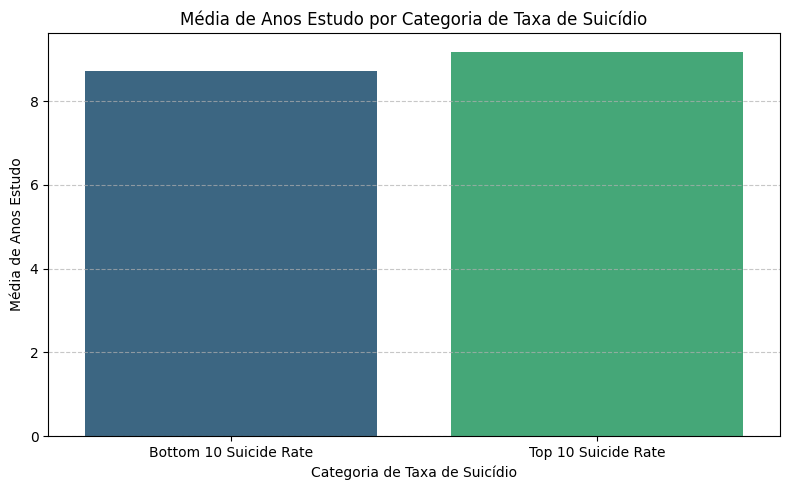

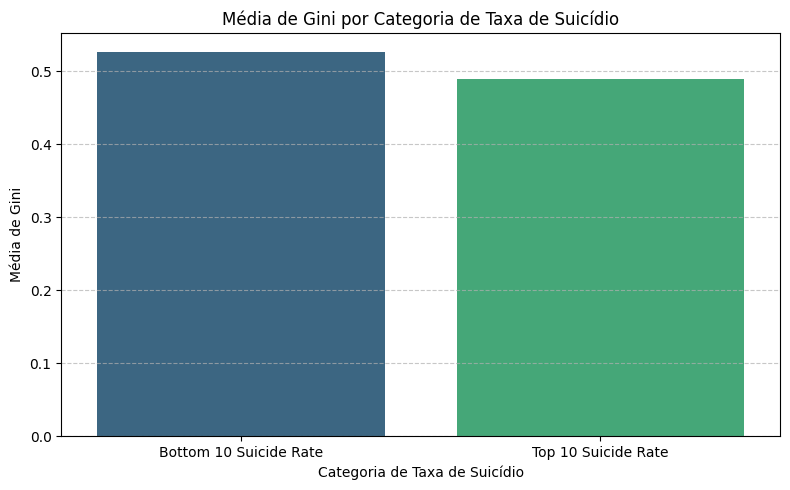

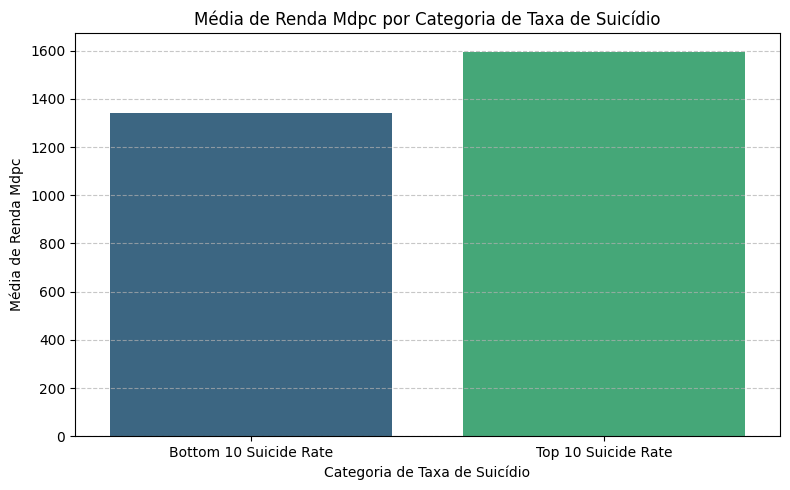

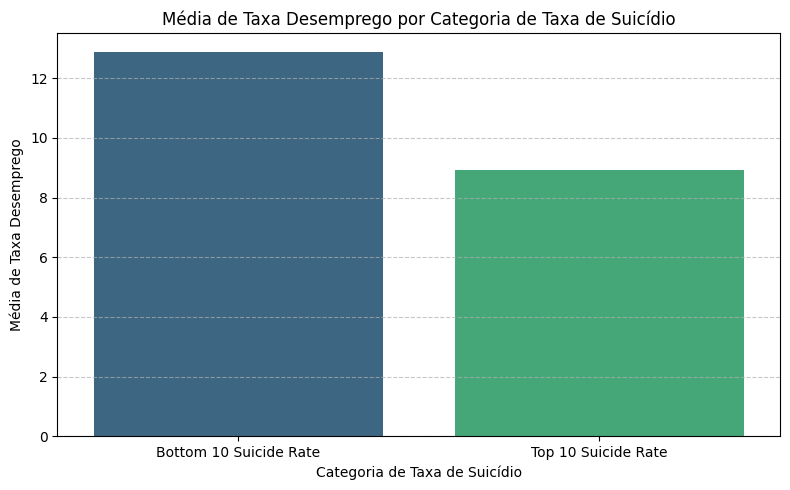

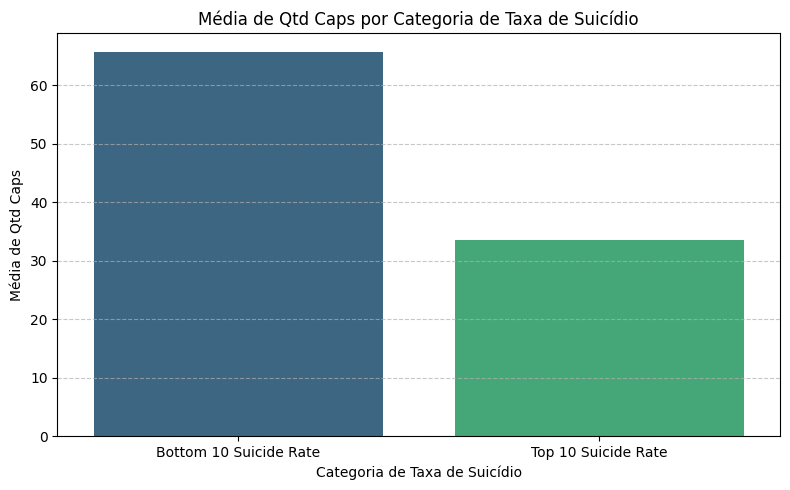

In [ ]:
parameters_to_exclude = ['taxa_suicidio']
features_for_barplot = [param for param in parameters_to_plot if param not in parameters_to_exclude]

for feature in features_for_barplot:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='categoria_uf', y=feature, data=avg_data_by_category, hue='categoria_uf', palette='viridis', legend=False)
    plt.title(f'Média de {feature.replace("_", " ").title()} por Categoria de Taxa de Suicídio')
    plt.xlabel('Categoria de Taxa de Suicídio')
    plt.ylabel(f'Média de {feature.replace("_", " ").title()}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'{feature}.png')
    plt.show()

# Preparando o dataset

### Faz uma cópia do dataframe e o normaliza

In [ ]:
df_copy = df.dropna()
df_copy = df_copy.drop(columns=['ano'])
numerical_cols = df_copy.select_dtypes(include=['number']).columns

df_numerical_for_scaling = df_copy[numerical_cols]

scaler = MinMaxScaler()

df_final_normalized_values = scaler.fit_transform(df_numerical_for_scaling)

df_normalizado = pd.DataFrame(df_final_normalized_values, columns=numerical_cols, index=df_copy.index)

display(df_normalizado.head())

,UF,qtd_caps,gini,ivs,anos_estudo,ppc_685,taxa_desemprego,renda_mdpc,taxa_suicidio
0,0.0,0.010152,0.191257,0.254980,0.144603,0.033588,0.077231,0.215552,0.215674
1,0.0,0.020305,0.295082,0.374502,0.221996,0.039055,0.157323,0.213048,0.339739
2,0.0,0.015228,0.311475,0.322709,0.205703,0.040881,0.293478,0.198979,0.302477
3,0.0,0.020305,0.213115,0.306773,0.287169,0.035791,0.307780,0.224672,0.347227
4,0.0,0.010152,0.480874,0.338645,0.327902,0.034207,0.362128,0.299226,0.400644


### Gráfico da matriz de correlação para o dataframe normalizado

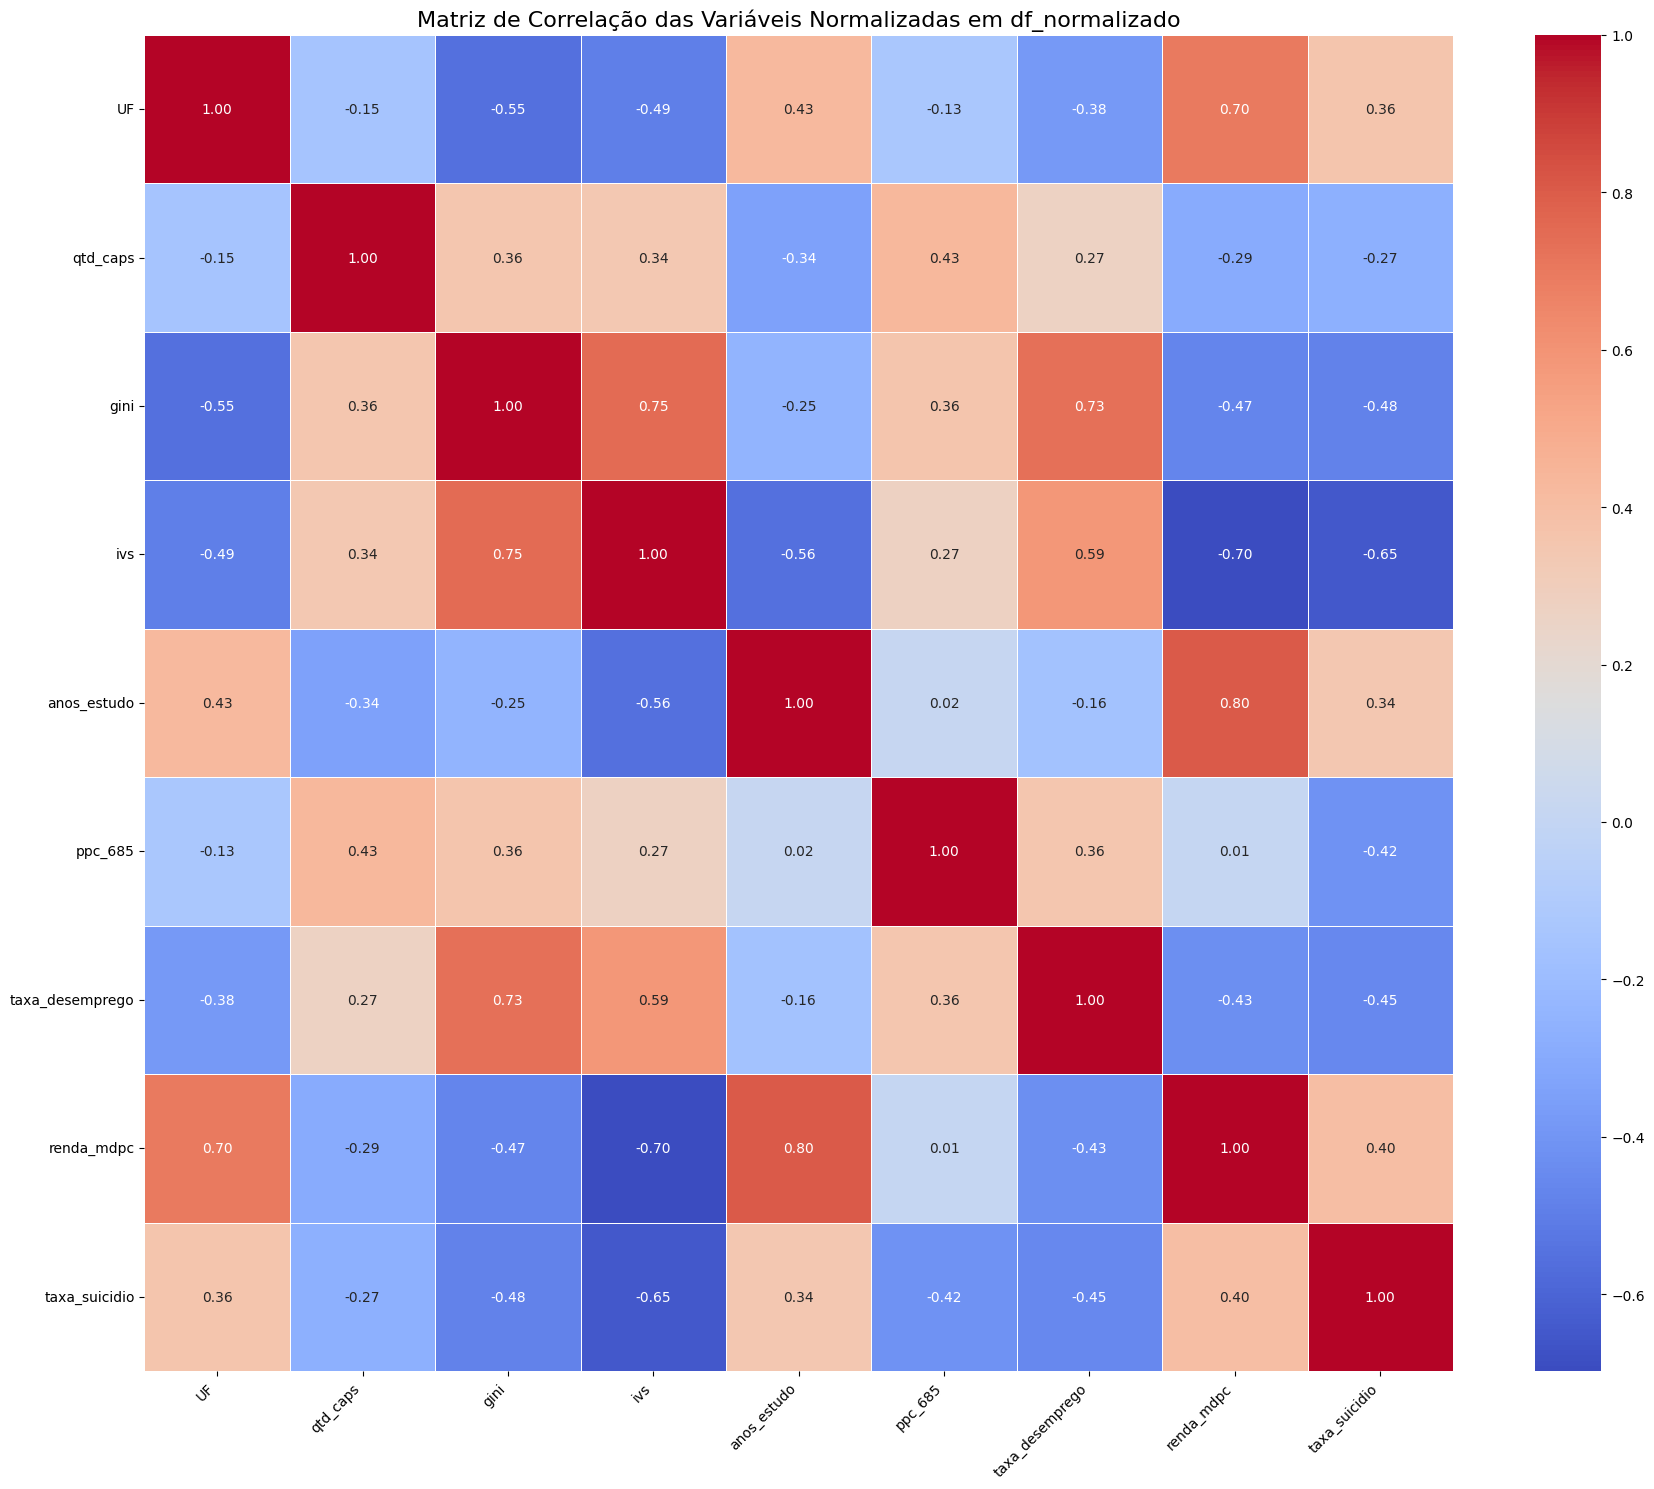

In [ ]:
correlation_matrix_normalizado = df_normalizado.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix_normalizado, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Normalizadas em df_normalizado', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.savefig('corr.png')
plt.show()

### Separa em feature e target

In [ ]:
X = df_normalizado.drop(columns=['taxa_suicidio', 'UF'])
y = df_normalizado['taxa_suicidio']

### Separa em conjuntos de treino e teste

In [ ]:
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape de X_train_normalized: {X_train_normalized.shape}")
print(f"Shape de X_test_normalized: {X_test_normalized.shape}")
print(f"Shape de y_train_normalized: {y_train_normalized.shape}")
print(f"Shape de y_test_normalized: {y_test_normalized.shape}")

Shape de X_train_normalized: (125, 7)
Shape de X_test_normalized: (32, 7)
Shape de y_train_normalized: (125,)
Shape de y_test_normalized: (32,)


# Random Forest

### Treina o modelo e exibe as métricas

In [ ]:
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train_normalized, y_train_normalized)
y_pred_normalized = random_forest_model.predict(X_test_normalized)

mae_normalized = metrics.mean_absolute_error(y_test_normalized, y_pred_normalized)
mse_normalized = metrics.mean_squared_error(y_test_normalized, y_pred_normalized)
r2_normalized = metrics.r2_score(y_test_normalized, y_pred_normalized)

print(f"Mean Absolute Error (MAE): {mae_normalized:.4f}")
print(f"Mean Squared Error (MSE): {mse_normalized:.4f}")
print(f"R-squared (R2): {r2_normalized:.4f}")

Mean Absolute Error (MAE): 0.0781
Mean Squared Error (MSE): 0.0097
R-squared (R2): 0.8000


### Avaliando o impacto das features

In [ ]:
feature_importances = random_forest_model.feature_importances_
feature_names = X_train_normalized.columns
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
display(importances_df)

Feature Importances:


,Feature,Importance
2,ivs,0.364829
3,anos_estudo,0.158979
4,ppc_685,0.120014
0,qtd_caps,0.117336
6,renda_mdpc,0.113429
1,gini,0.064606
5,taxa_desemprego,0.060806


/tmp/ipython-input-3166076264.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')


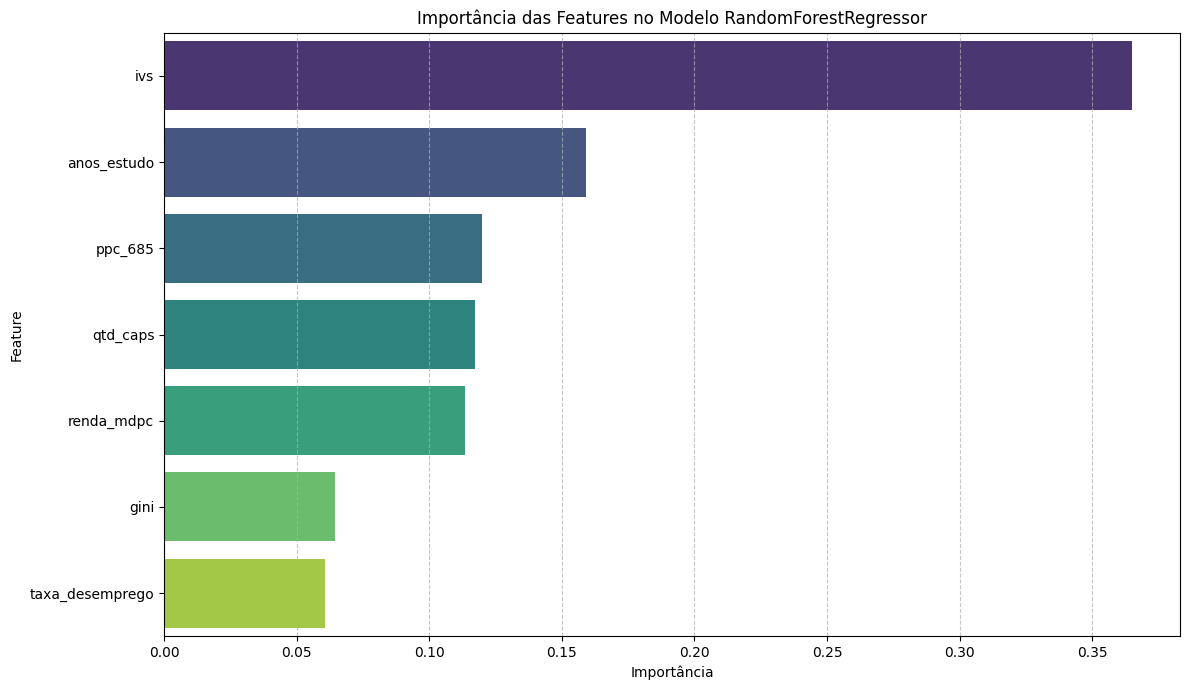

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=importances_df, palette='viridis')
plt.title('Importância das Features no Modelo RandomForestRegressor')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('importancia.png')
plt.show()